In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def f(x):
    return np.cos(x[0] * (2 * np.pi)) +  0.3 * np.sin(3 * x[0] * (2 * np.pi)) -  0.2 * np.cos(4 * x[0] * (2 * np.pi)) + \
            np.sin(x[1] * (2 * np.pi)) +  0.1 * np.cos(3 * x[1] * (2 * np.pi)) -  0.5 * np.cos(4 * x[1] * (2 * np.pi)) + \
            np.cos(2 * x[0] * x[1] * (2 * np.pi))

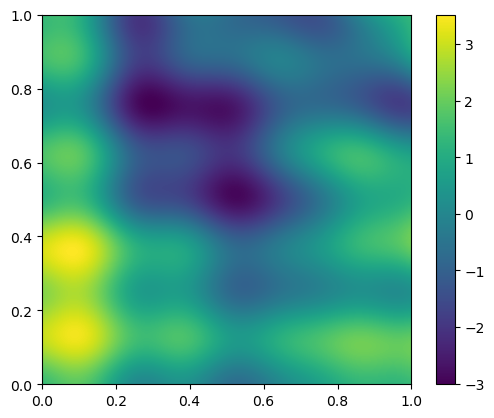

In [63]:
x1, x2 = np.meshgrid(np.arange(0,1, 0.001), np.arange(0,1, 0.001))
y = f(np.stack((x1,x2)))
plt.imshow(y,extent=[0,1,0,1], origin='lower')
plt.colorbar()

In [122]:
sigma = 1
l = 1

p1 = np.array([[1, 2, 3],
              [4, 5, 6]])
p2 = np.array([[1, 2, 3]])

kernel = lambda x1, x2 : (sigma ** 2) * np.exp(- (np.linalg.norm(x1 - x2, axis=1) ** 2) / (2*l**2))
print(kernel(p1,p2))

print(kernel(p1,p1))

[1.00000000e+00 1.37095909e-06]
[1. 1.]


In [121]:
class BayesianOptimizer:

    def __init__(self, dim=2):
        self.points = np.array([[]])
        self.values = np.array([])
        self.n_points = 0

        self.sigma = 1
        
        self.kernel = lambda x1, x2 : (sigma ** 2) * np.exp(- (np.linalg.norm(x1 - x2, axis=1) ** 2) / (2*l**2))
        self.dim = 2

    def add_point(self, new_point, new_value):

        if self.n_points > 0:
            self.points = np.append(self.points, new_point[np.newaxis, :], axis=0)
            self.values = np.append(self.values, new_value)

        else:
            self.points = new_point[np.newaxis, :]
            self.values = np.array([new_value])
        
        self.n_points +=1
        
        if self.n_points > 1:
            self.K = kernel(self.points, self.points)
            self.K_inv = np.linalg.inv(self.K)
            print('self.K', self.K)
        
    def estimate_surrogate(self, x):
        K_star = self.kernel(self.points, x[np.newaxis, :])

        print('K_star', K_star.T, 'K_inv', self.K_inv, 'values', self.values)
        mu_star = K_star.T @ self.K_inv @ self.values
        cov_star = self.kernel(x[np.newaxis, :], x[np.newaxis, :]) - K_star.T @ self.K_inv @ K_star

        print('kernel(x,x)', self.kernel(x[np.newaxis, :], x[np.newaxis, :]))
        return 1./(np.sqrt(2.*np.pi) * cov_star[0,0])
        

point1 = np.array([0.5,.8])
point2 = np.array([0.7, 0.3])

bayes_opt = BayesianOptimizer()
bayes_opt.add_point(point1, f(point1))
print(bayes_opt.values)
bayes_opt.add_point(point2, f(point2))
print(bayes_opt.values)


bayes_opt.estimate_surrogate(np.array([0.1, 0.2]))

[-2.07744972]


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional